# Assignment 1: plots, bar charts, and filtering

This assignment uses a dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019.  Download the file from Blackboard.  The original, unfiltered dataset is at [https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

There are a lot of columns in this dataset.  To show them all when displaying the dataset, use the following code beforehand (once per notebook):
`pd.set_option('display.max_columns', None)`

All plots should have an appropriate title and axes labels.

1.  Plot a histogram to visualize the distribution of the inspection scores.  You should experiment with the number of bins to find a visualization that shows all major features of the distribution.  What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

2.  Plot a bar chart of the distribution of boroughs.  In which boroughs are the most/least restaurant inspections?

3.  Find the mean score for inspections made in January and the mean score for inspections made in July.  From these computations, does the mean score seem to depend on the month?  Why do you think this might be?

4.  Make a bar chart of the top 15 cuisine types in the dataset.

5.  How many different cuisine types are there in the dataset?  And what is the most common street?

### Preliminaries:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# show all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [4]:
df["INSPECTION DATE"] = pd.to_datetime(df["INSPECTION DATE"])

In [5]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50074557,FISH VILLAGE,Queens,2007,127TH ST,11356.0,6468307299,Chinese,2019-01-02,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,N,22.0,NaN,NaN,08/30/2019,Cycle Inspection / Initial Inspection,40.781449,-73.841413,407.0,19.0,91900.0,4099328.0,4.041720e+09,QN23
1,50086382,IL POSTO,Brooklyn,7409,AVENUE U,11234.0,7182414317,Italian,2019-01-02,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,29.0,NaN,NaN,08/30/2019,Pre-permit (Operational) / Initial Inspection,40.621321,-73.905154,318.0,46.0,69602.0,3237484.0,3.084150e+09,BK45
2,41258823,LITTLE CAESARS,Bronx,1888,WESTCHESTER AVENUE,10472.0,3476571722,Pizza,2019-01-02,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,4.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.832928,-73.861964,209.0,18.0,7200.0,NaN,2.000000e+00,BX55
3,50002053,THE LOCAL,Queens,13-02,44TH AVENUE,11101.0,3477385251,American,2019-01-02,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,7.0,A,01/02/2019,08/30/2019,Cycle Inspection / Initial Inspection,40.749644,-73.947487,402.0,26.0,1900.0,4005221.0,4.004460e+09,QN31
4,50055374,FLORA BAR,Manhattan,945,MADISON AVE,10021.0,6317038780,American,2019-01-02,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,11.0,A,01/02/2019,08/30/2019,Cycle Inspection / Re-inspection,40.773450,-73.964199,108.0,4.0,13000.0,1041666.0,1.013890e+09,MN40


### Question 1
Plot a histogram to visualize the distribution of the inspection scores.  You should experiment with the number of bins to find a visualization that shows all major features of the distribution.  What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

Text(0,0.5,'# of restaurants')

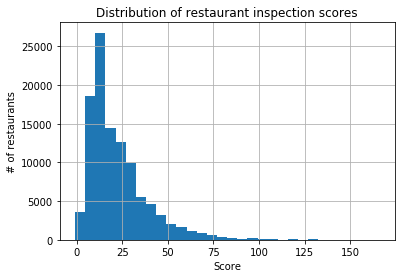

In [6]:
df["SCORE"].hist(bins = 30)
plt.title("Distribution of restaurant inspection scores")
plt.xlabel("Score")
plt.ylabel("# of restaurants")

Not many restaurants have a very low scores.  The number of restaurants then quickly peaks around a score in the teens, and then drops off more gradually.  Restaurants are re-inspected if they don't score an A (0-7), and particularly bad scoring restaurants are inspected every month, so many of the inspections will be follow-up inspections for poor-scoring restaurants, resulting in more inspections having higher scores in the dataset.

### Question 2
Plot a bar chart of the distribution of boroughs.  In which boroughs are the most/least restaurant inspections?

Text(0,0.5,'# of inspections')

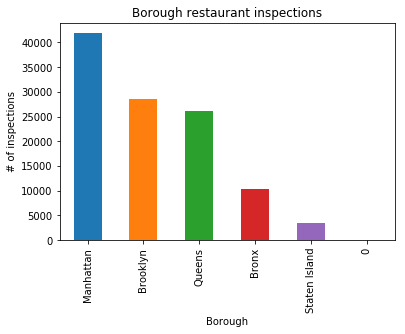

In [7]:
borough_counts = df["BORO"].value_counts()
borough_counts.plot.bar()
plt.title("Borough restaurant inspections")
plt.xlabel("Borough")
plt.ylabel("# of inspections")

The borough with the most restaurant inspections is Manhattan and the borough with the least restaurant inspections is Staten Island.

### Question 3
Find the mean score for inspections made in January and the mean score for inspections made in July.  From these computations, does the mean score seem to depend on the month?    Why do you think this might be?

In [8]:
# mean of the January scores
jan_filter = df["INSPECTION DATE"].dt.month == 1
df[jan_filter]["SCORE"].mean()

20.332909899283187

In [9]:
# mean of the July scores
july_filter = df["INSPECTION DATE"].dt.month == 7
df[july_filter]["SCORE"].mean()

26.203096228602604

The mean score in January is significantly lower than in July.  Since a lower score is better, restaurants inspected in January seem to receive lower scores than in July, possibly because the hot weather in July makes sanitation more challenging due to more rodents and insects.

### Question 4
Make a bar chart of the top 15 cuisine types in the dataset.

In [10]:
food_counts = df["CUISINE DESCRIPTION"].value_counts()
food_counts

American                                                            21688
Chinese                                                             12486
Café/Coffee/Tea                                                      5456
Pizza                                                                5128
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     4696
Mexican                                                              4411
Italian                                                              4283
Caribbean                                                            4180
Japanese                                                             3848
Spanish                                                              3696
Bakery                                                               3233
Chicken                                                              2381
Pizza/Italian                                                        2276
Indian                                

Text(0,0.5,'# of inspections')

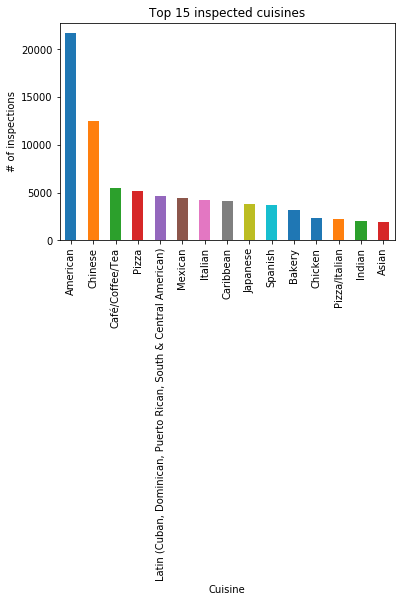

In [11]:
food_counts.head(15).plot.bar()
plt.title("Top 15 inspected cuisines")
plt.xlabel("Cuisine")
plt.ylabel("# of inspections")

### Question 5
How many different cuisine types are there in the dataset?

In [13]:
df.describe(include = ["O"])

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,NTA
count,110364,110364,110315,110364,110363,110364,110364,109465,107996,107996,57134,55214,110364,110364,108816
unique,17130,6,6498,2927,20042,84,5,91,79,2,6,209,1,27,193
top,DUNKIN',Manhattan,1,BROADWAY,9177437388,American,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,A,06/13/2019,08/30/2019,Cycle Inspection / Initial Inspection,MN17
freq,923,41873,611,3805,86,21688,103692,15724,15724,60494,41662,537,110364,64829,6063


There are 84 different cuisine types in the dataset.  The most common street is Broadway.